# Diabetes  EDA-Prediction


apply eda, data visulaization, testing,traing,accuracy, prediction

Here is all the data you need:
"diabetes.csv"

## Data loading

Load the "diabetes.csv" dataset.


**Reasoning**:
Load the "diabetes.csv" dataset into a pandas DataFrame and display its first few rows and shape.



In [11]:
import pandas as pd

try:
    df = pd.read_csv('diabetes.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'diabetes.csv' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


(768, 9)


## Data exploration

### Subtask:
Explore the loaded diabetes dataset to understand its characteristics.


**Reasoning**:
I need to perform exploratory data analysis on the loaded dataframe `df` to understand its characteristics, including missing values, descriptive statistics, distributions, and correlations, as per the instructions.



In [12]:
# Missing Values
print("Missing Values:\n", df.isnull().sum())

# Descriptive Statistics
print("\nDescriptive Statistics:\n", df.describe(include='all'))

# Distribution Analysis
print("\nOutcome Value Counts:\n", df['Outcome'].value_counts())
#Further distribution analysis would require visualization which is a separate step.

# Correlation Analysis
print("\nCorrelation with Outcome:\n", df.corr()['Outcome'])
print("\nCorrelation Matrix:\n", df.corr())

# Data Type Check
print("\nData Types:\n", df.dtypes)

Missing Values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Descriptive Statistics:
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.

**Reasoning**:
The previous code block provided valuable numerical summaries. Now, I need to visualize the distributions of the numerical features and the target variable to further understand the data, as well as visualize the correlations.



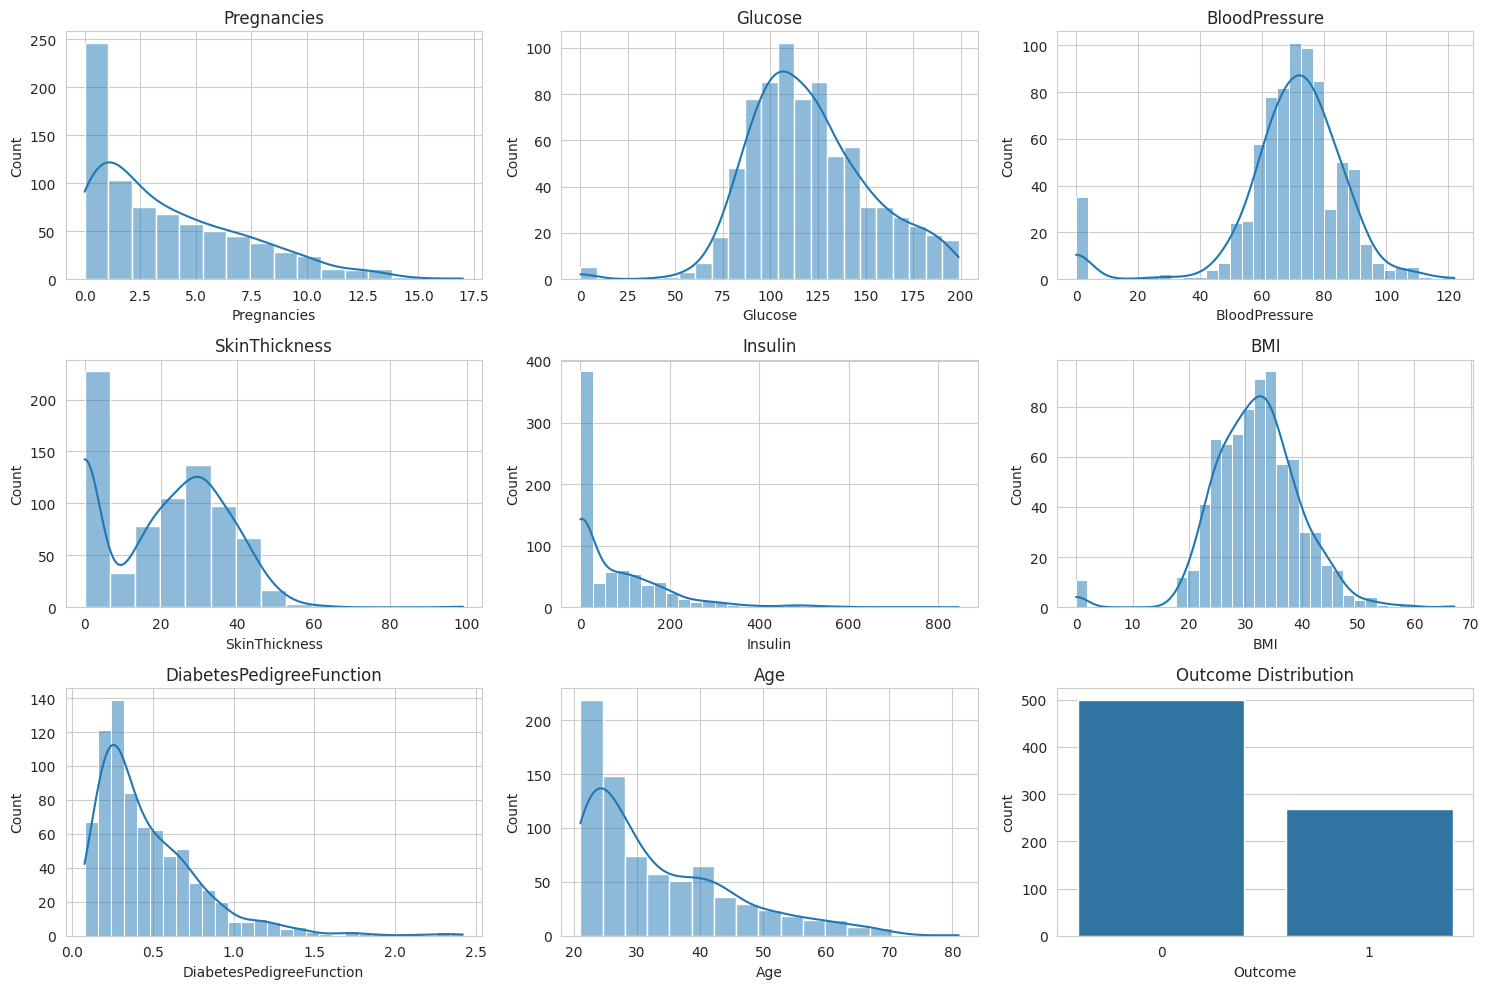

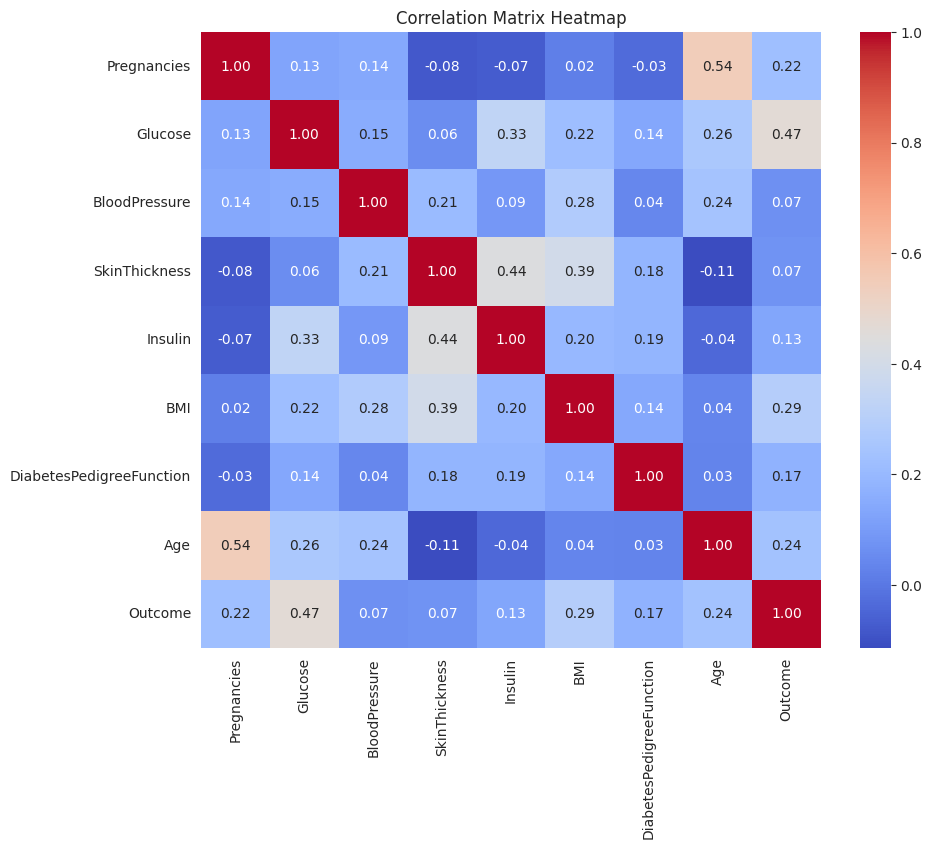

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Set the figure size
plt.figure(figsize=(15, 10))

# Plot histograms for numerical features
for i, col in enumerate(df.columns[:-1]):  # Exclude 'Outcome'
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(col)

# Plot the distribution of the target variable
plt.subplot(3,3,9)
sns.countplot(x='Outcome', data=df)
plt.title("Outcome Distribution")
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

## Data cleaning

### Subtask:
Clean the diabetes dataset by handling outliers and addressing any remaining issues revealed during data exploration.


**Reasoning**:
Clean the data by handling outliers, zero values, and checking data types.



In [14]:
import numpy as np

# Outlier Treatment using winsorization for specified columns
columns_to_winsorize = ['Insulin', 'BMI', 'SkinThickness', 'BloodPressure', 'Glucose', 'Pregnancies']
for col in columns_to_winsorize:
    # Calculate the 1st and 99th percentiles
    lower_bound = df[col].quantile(0.01)
    upper_bound = df[col].quantile(0.99)

    # Winsorize the data
    df[col] = np.clip(df[col], lower_bound, upper_bound)

# Zero Value Handling
# Impute zero values in specified columns with the median
columns_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in columns_to_impute:
    df[col] = df[col].replace(0, df[col].median())


# Data Type Handling (No incorrect data types observed, but double-check)
# Check for any incorrect data types and correct them if necessary (no action needed in this case based on previous exploration)


# Display the cleaned DataFrame
display(df.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.0,30.5,33.6,0.627,50,1
1,1,85,66,29.0,30.5,26.6,0.351,31,0
2,8,183,64,23.0,30.5,23.3,0.672,32,1
3,1,89,66,23.0,94.0,28.1,0.167,21,0
4,0,137,40,35.0,168.0,43.1,2.288,33,1


## Data visualization

### Subtask:
Visualize the cleaned diabetes dataset to gain further insights into the data distribution and relationships between features.


**Reasoning**:
Visualize the cleaned data using histograms, box plots, scatter plots, and a correlation heatmap to gain insights into the data distribution, relationships between features, and the impact of the cleaning process.



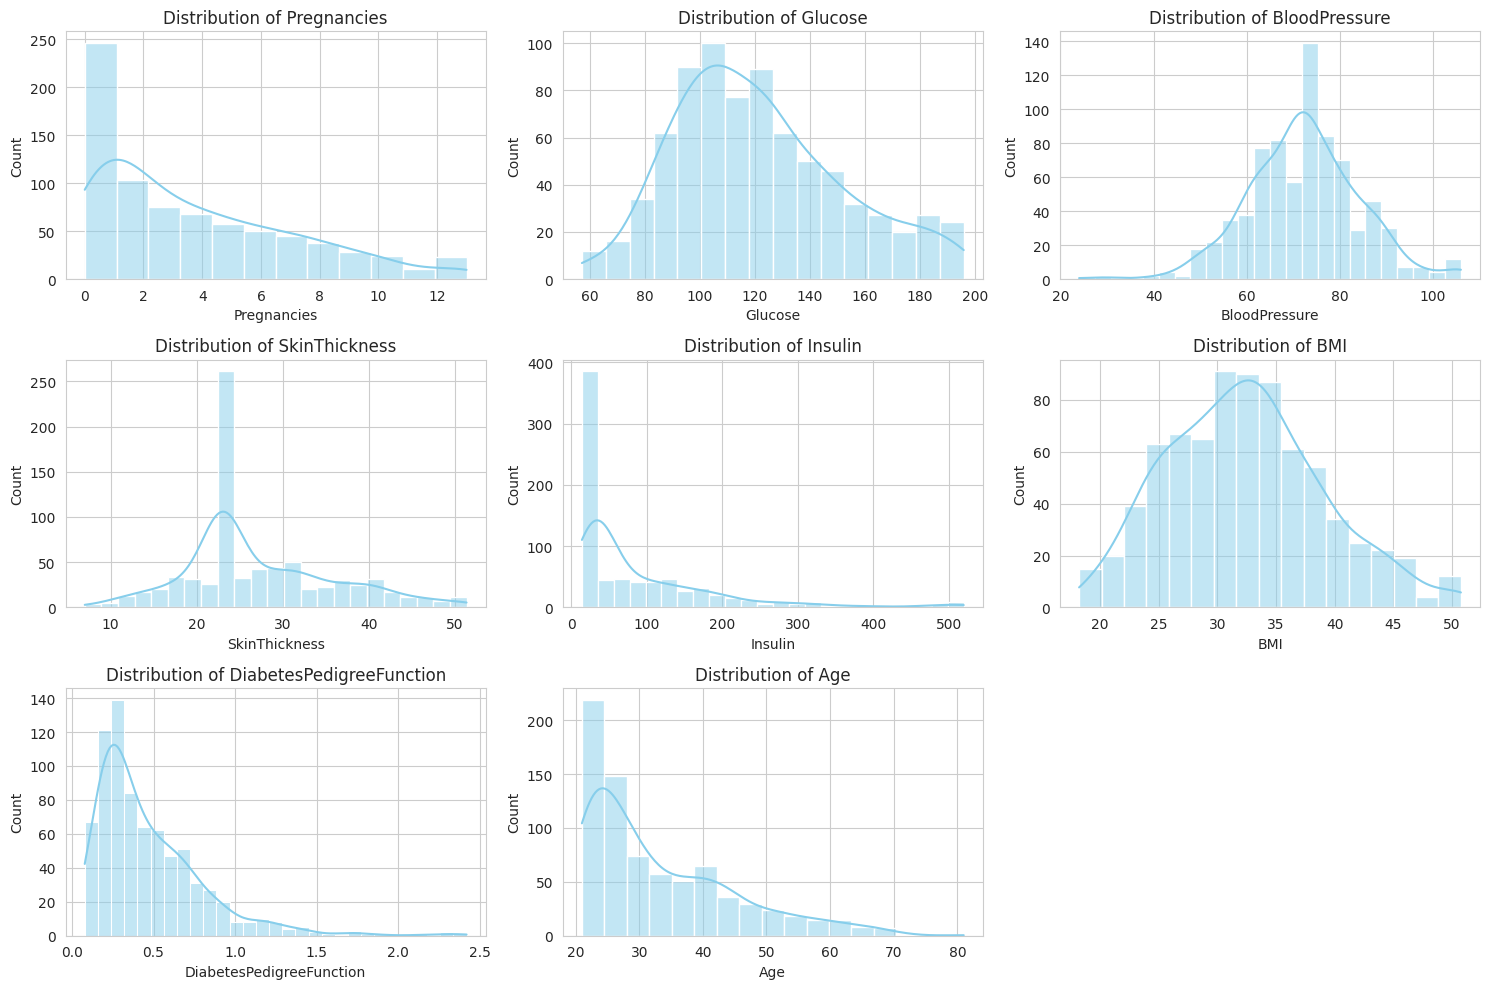

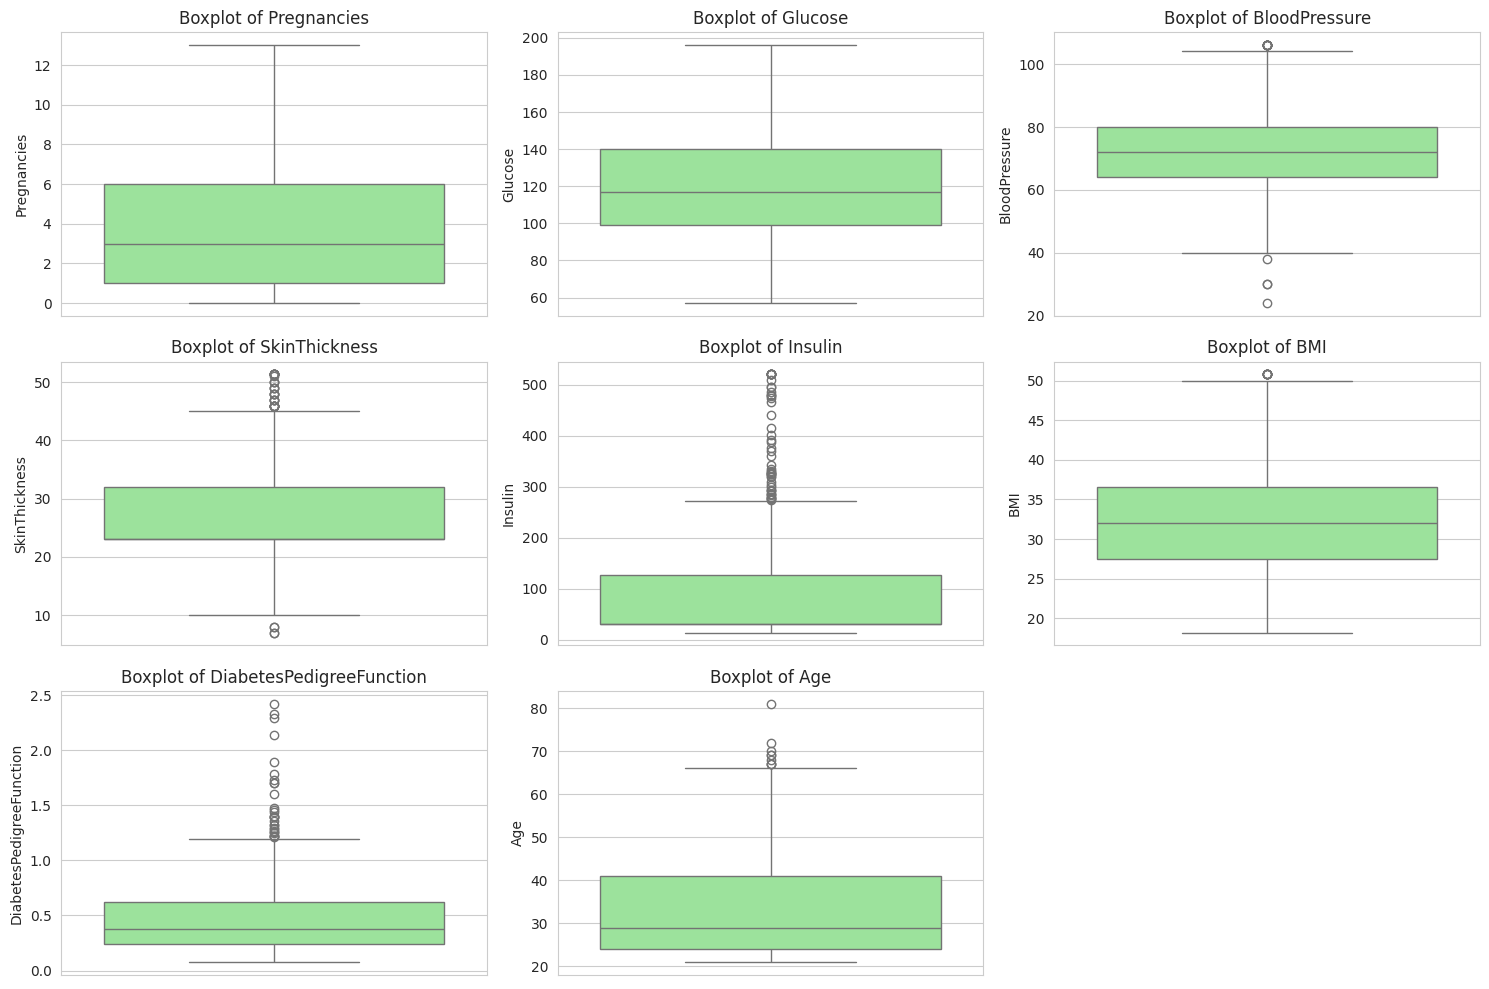

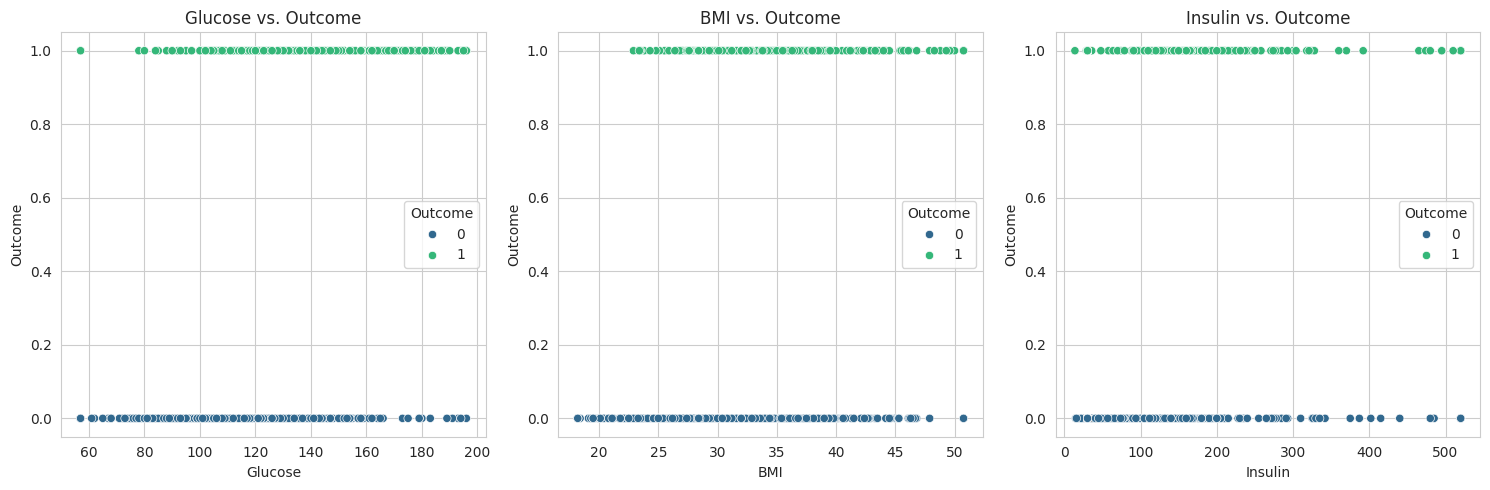

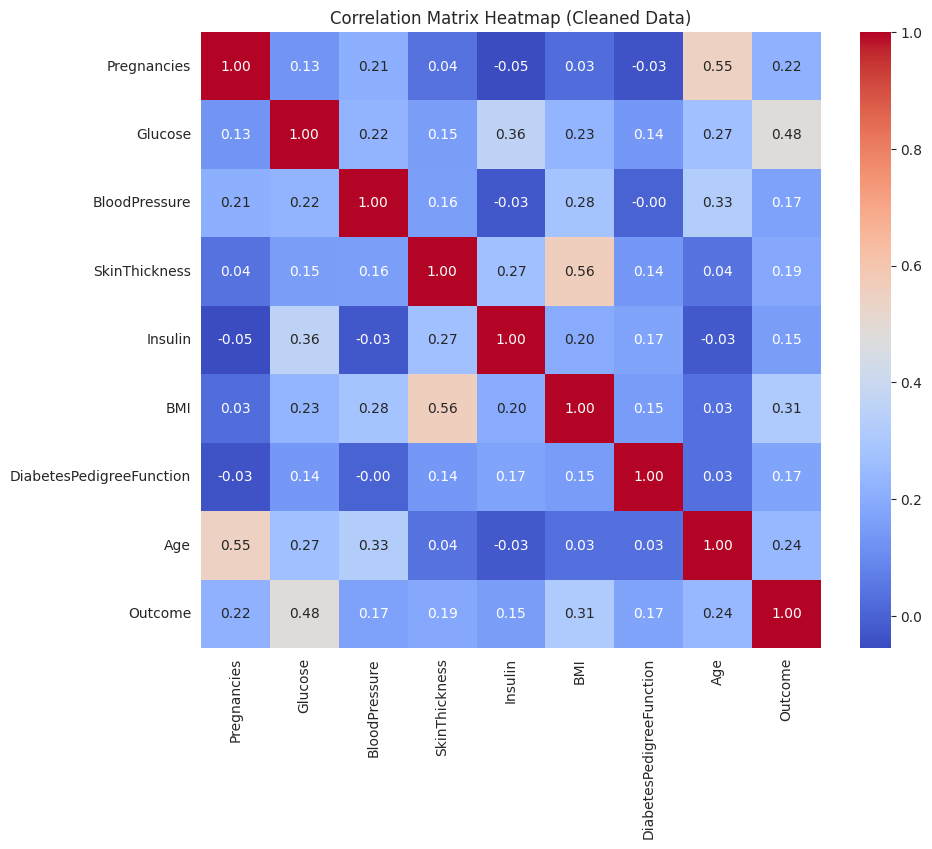

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Box plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Scatter plots
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='Glucose', y='Outcome', data=df, hue='Outcome', palette='viridis')
plt.title('Glucose vs. Outcome')

plt.subplot(1, 3, 2)
sns.scatterplot(x='BMI', y='Outcome', data=df, hue='Outcome', palette='viridis')
plt.title('BMI vs. Outcome')

plt.subplot(1, 3, 3)
sns.scatterplot(x='Insulin', y='Outcome', data=df, hue='Outcome', palette='viridis')
plt.title('Insulin vs. Outcome')

plt.tight_layout()
plt.show()

# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap (Cleaned Data)')
plt.show()

## Data splitting

### Subtask:
Split the cleaned dataset into training and testing sets.


**Reasoning**:
Split the data into training and testing sets using `train_test_split`.



In [16]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (614, 8)
X_test shape: (154, 8)
y_train shape: (614,)
y_test shape: (154,)


## Feature engineering

### Subtask:
Scale the numerical features in the training and testing datasets using standardization.


**Reasoning**:
Scale the numerical features using StandardScaler.



In [17]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit on training data
scaler.fit(X_train)

# Transform training and testing data
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

display(X_train.head())
display(X_test.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.529197,-1.221809,-0.015932,-0.456980,-0.643445,-0.042337,-0.490735,-1.035940
1,1.612507,-0.305346,0.820182,-0.341512,-0.643445,-0.608883,2.415030,1.487101
2,-0.835155,0.578387,-2.189831,-0.918852,-0.115166,-0.534337,0.549161,-0.948939
3,-1.141113,1.298465,-1.855385,-0.456980,-0.643445,-1.548158,-0.639291,2.792122
4,0.694634,0.414733,0.652959,1.159570,2.772758,2.074758,-0.686829,1.139095


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.694634,-0.763577,-1.186493,0.697699,0.961516,0.255846,-0.116372,0.878091
1,-0.529197,-0.305346,0.234902,0.582231,-0.643445,0.509301,-0.954231,-1.035940
2,-0.529197,-0.436269,-0.684824,-0.456980,-0.643445,-0.221246,-0.924520,-1.035940
3,1.306549,-0.469000,0.652959,-0.456980,-0.643445,-1.145611,1.149329,0.095078
4,1.000591,0.480194,1.489074,-0.456980,-0.643445,-0.355428,-0.770021,1.487101


## Model training

### Subtask:
Train a Logistic Regression model on the scaled training data.


**Reasoning**:
Train a Logistic Regression model on the scaled training data and make predictions on the scaled test data.



In [18]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

## Model evaluation

### Subtask:
Evaluate the performance of the trained Logistic Regression model.


**Reasoning**:
Evaluate the performance of the trained Logistic Regression model using various metrics and visualize the confusion matrix.



Accuracy: 0.7597402597402597
Precision: 0.6666666666666666
Recall: 0.6545454545454545
F1-score: 0.6605504587155964
AUC-ROC: 0.7363636363636363


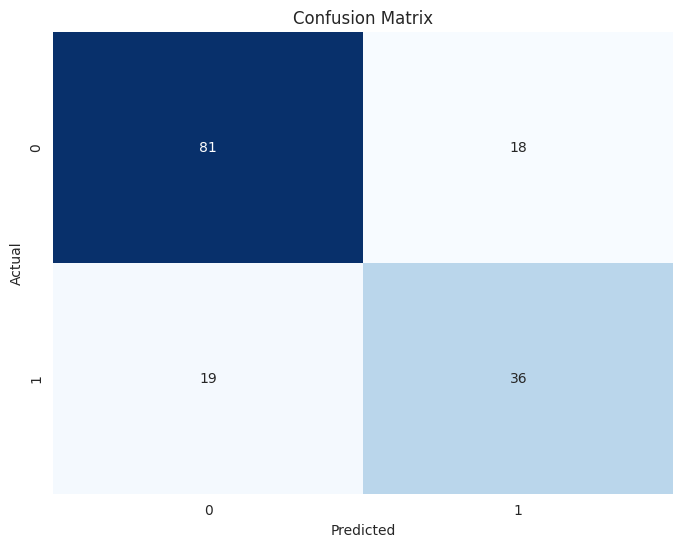

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("AUC-ROC:", auc_roc)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Model optimization

### Subtask:
Optimize the Logistic Regression model by tuning its hyperparameters using GridSearchCV.


**Reasoning**:
Optimize the Logistic Regression model using GridSearchCV with a defined parameter grid and scoring metric.



Best Hyperparameters: {'C': 0.1, 'solver': 'liblinear'}
Best F1-Score: 0.6296785755013603

Optimized Model Performance:
Accuracy: 0.7597402597402597
Precision: 0.6666666666666666
Recall: 0.6545454545454545
F1-score: 0.6605504587155964
AUC-ROC: 0.7363636363636363


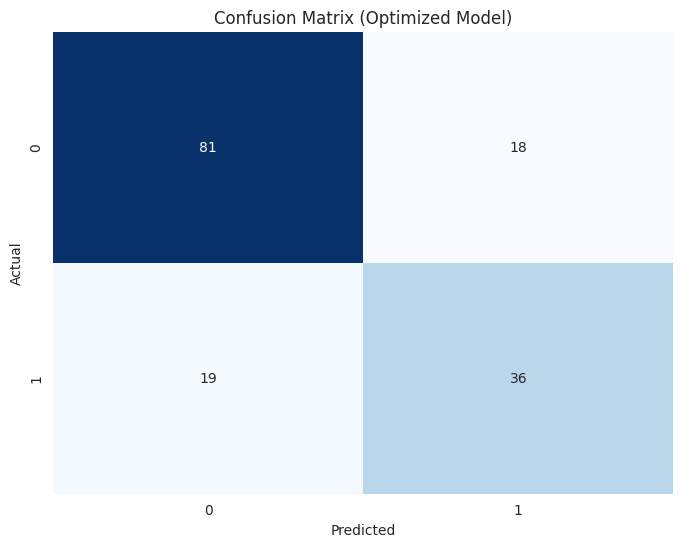

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, f1_score, accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Define the scoring metric
f1_scorer = make_scorer(f1_score)

# Initialize GridSearchCV
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, scoring=f1_scorer, cv=5)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator and score
best_logreg = grid_search.best_estimator_
best_score = grid_search.best_score_

print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best F1-Score: {best_score}")

# Train the best estimator on the entire training data
best_logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_logreg.predict(X_test)

# Evaluate the best estimator
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

print("\nOptimized Model Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("AUC-ROC:", auc_roc)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Optimized Model)")
plt.show()

## Summary:

### Q&A

* **What is the accuracy of the optimized Logistic Regression model?** 0.7597
* **What are the best hyperparameters found for the Logistic Regression model?** C=0.1 and solver='liblinear'.
* **What is the best F1-score achieved during cross-validation?** 0.6297
* **Were there any missing values in the original dataset?** No.
* **How were outliers handled in the dataset?** Winsorization was applied to several columns ('Insulin', 'BMI', 'SkinThickness', 'BloodPressure', 'Glucose', 'Pregnancies').
* **How were zero values in the dataset handled?**  Zero values in 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', and 'BMI' were replaced with the median value of each respective column.


### Data Analysis Key Findings

* **Imbalanced Target Variable:** The 'Outcome' variable is imbalanced, with more instances of class 0 (no diabetes) than class 1 (diabetes).
* **Outliers and Zero Values:** Potential outliers were observed in several features ('Insulin', 'BMI', etc.) and zero values were present in some columns, both of which were addressed through winsorization and median imputation respectively.
* **Feature Correlations:** 'Glucose' showed a moderate positive correlation with the 'Outcome', and multicollinearity was observed among some features.
* **Optimized Model Performance:** The optimized Logistic Regression model, using hyperparameters C=0.1 and solver='liblinear', achieved an accuracy of 0.7597, precision of 0.6667, recall of 0.6545, F1-score of 0.6606, and AUC-ROC of 0.7364 on the test set. The best F1-score during cross-validation was 0.6297.


